In [17]:
import os
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig
from env.VRPInstance import VRPInstance
from argparse import Namespace
import plotly.graph_objects as go

In [18]:
VRP_KEYS = ["ORTEC-n242-k12", "ORTEC-n323-k21", "ORTEC-n405-k18", "ORTEC-n455-k41", "ORTEC-n510-k23", "ORTEC-n701-k64", "Loggi-n401-k23", "Loggi-n501-k24", "Loggi-n601-k19", "Loggi-n601-k42", "Loggi-n901-k42", "Loggi-n1001-k31"]
VRP_KEYS = [f"{name}.vrp" for name in VRP_KEYS]

In [19]:
pd.options.display.float_format = '{:.2f}'.format

In [20]:
print("Initial scores:")
args = Namespace(round_int=True, algo=None, data_folder='dataset/train/data_dimacs')
init_scores = {}
for key in VRP_KEYS:
    instance = VRPInstance.from_path(f"dataset/train/data_dimacs/{key}", args, key)
    init_score = instance.evaluation(instance.init_solution)
    init_scores[key] = float(init_score)
init_scores = pd.Series(init_scores).to_frame(name="Score")
init_scores

Initial scores:


,Score
ORTEC-n242-k12.vrp,360432.00
ORTEC-n323-k21.vrp,534424.00
ORTEC-n405-k18.vrp,568045.00
ORTEC-n455-k41.vrp,665659.00
ORTEC-n510-k23.vrp,529275.00
ORTEC-n701-k64.vrp,970165.00
Loggi-n401-k23.vrp,558778.00
Loggi-n501-k24.vrp,640072.00
Loggi-n601-k19.vrp,483586.00
Loggi-n601-k42.vrp,899388.00


In [21]:
def load_score(folder, seeds):
    df = load_all_scores(folder, seeds, VRP_KEYS)
    best_score = df.applymap(lambda x: min(x))
    overall = best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
    overall.index = ["Min", "Max", "Mean", "Std."]
    return df, best_score, overall.T

In [22]:
print("IRL_HGS2 scores:")
irl_hgs_2_df, irl_hgs_2_best_score, irl_hgs_2_overall = load_score("logs/dataset_train_data_dimacs_HGS_0.1", range(1, 4))
irl_hgs_2_overall

IRL_HGS2 scores:


,Min,Max,Mean,Std.
ORTEC-n242-k12.vrp,123808.00,123832.00,123818.00,10.20
ORTEC-n323-k21.vrp,214125.00,215530.00,214769.00,579.52
ORTEC-n405-k18.vrp,200986.00,200986.00,200986.00,0.00
ORTEC-n455-k41.vrp,292516.00,292777.00,292690.00,123.04
ORTEC-n510-k23.vrp,184746.00,185367.00,185010.33,261.79
ORTEC-n701-k64.vrp,446537.00,446579.00,446551.67,19.34
Loggi-n401-k23.vrp,337206.00,337279.00,337244.33,29.91
Loggi-n501-k24.vrp,177078.00,177654.00,177270.00,271.53
Loggi-n601-k19.vrp,113225.00,113291.00,113250.33,29.04
Loggi-n601-k42.vrp,347082.00,347506.00,347241.67,188.26


In [23]:
print("IRL_VNS2 scores:")
irl_vns_2_df, irl_vns_2_best_score, irl_vns_2_overall = load_score("logs/dataset_train_data_dimacs_VNS_0.1", range(1, 4))
irl_vns_2_overall

IRL_VNS2 scores:


,Min,Max,Mean,Std.
ORTEC-n242-k12.vrp,124456.00,125094.00,124840.67,276.52
ORTEC-n323-k21.vrp,215394.00,216799.00,215964.67,603.13
ORTEC-n405-k18.vrp,202962.00,203972.00,203313.00,466.31
ORTEC-n455-k41.vrp,294470.00,296018.00,295205.00,634.37
ORTEC-n510-k23.vrp,185507.00,185817.00,185640.33,130.21
ORTEC-n701-k64.vrp,450240.00,453172.00,452119.00,1331.88
Loggi-n401-k23.vrp,337497.00,340702.00,338657.00,1450.39
Loggi-n501-k24.vrp,178067.00,178824.00,178380.00,322.63
Loggi-n601-k19.vrp,113707.00,114285.00,113943.67,247.30
Loggi-n601-k42.vrp,349414.00,352205.00,350729.33,1145.05


In [24]:
def show_init_graphs(key_str="E-"):
    names = [x for x in VRP_KEYS if key_str in x]
    n = len(names)
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_dimacs", exist_ok=True)
    args = Namespace(round_int=False, algo=None, data_folder='dataset/train/data_dimacs')
    for i, key in enumerate(names):
        instance = VRPInstance.from_path(f"dataset/train/data_dimacs/{key}", args, key)
        instance.solution = instance.init_solution
        plotly_fig, score = instance.plot(), instance.evaluation(instance.solution)
        plotly_fig.write_image(f"graphs/dataset_train_data_dimacs/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*2, width=180*2*n)
    fig.update_traces(line_width=1, marker_size=2)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

In [25]:
def show_graphs(algo, lamb, best_scores, key_str="E-"):
    names = [x for x in VRP_KEYS if key_str in x]
    n = len(names)
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_dimacs_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(names):
        plotly_fig, score = instance_fig(best_scores, key, "dataset/train/data_dimacs")
        plotly_fig.write_image(f"graphs/dataset_train_data_dimacs_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*2, width=180*2*n)
    fig.update_traces(line_width=1, marker_size=2)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

ORTEC instances:
ClockHand


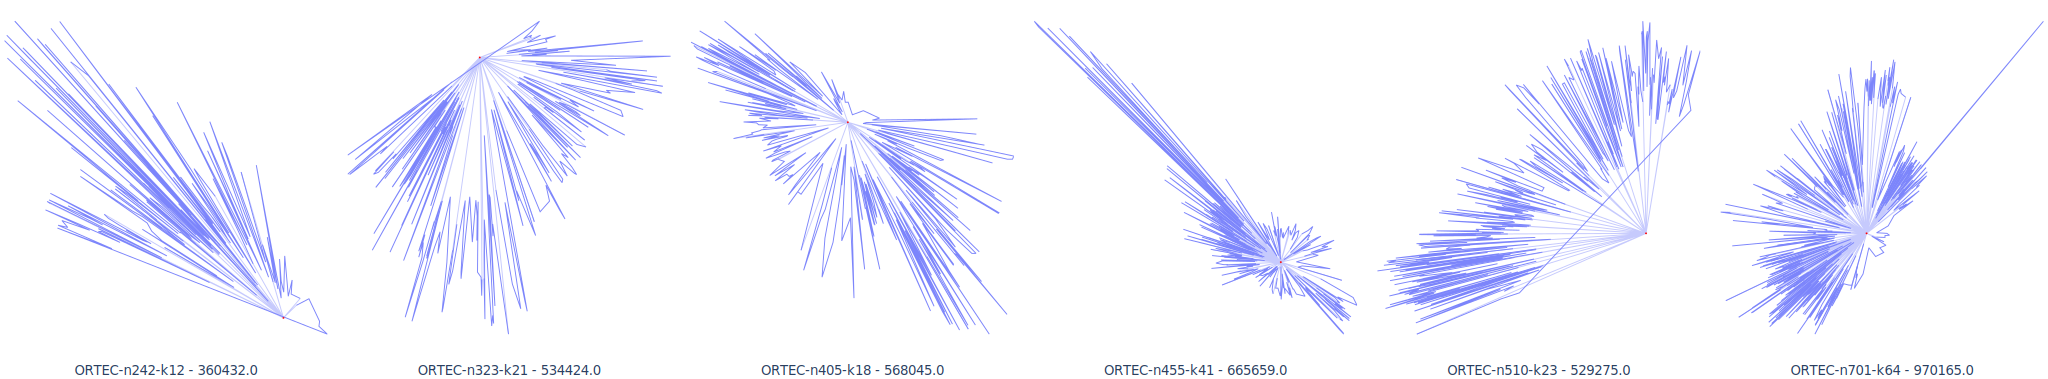

IRL_HGS2


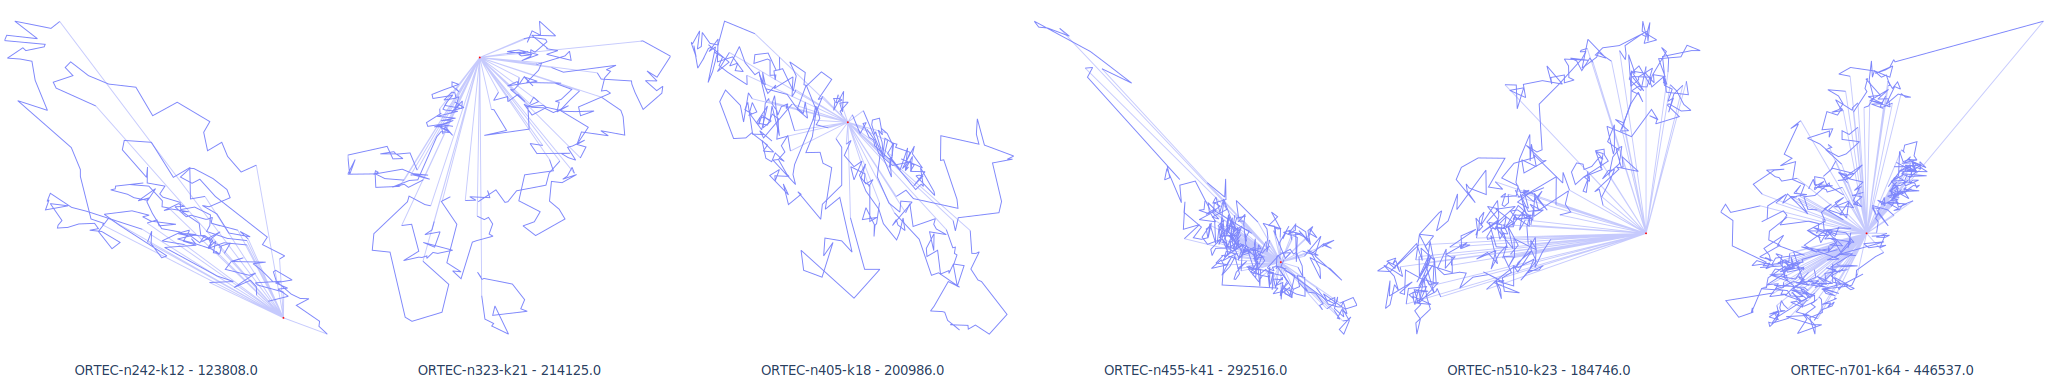

IRL_VNS2


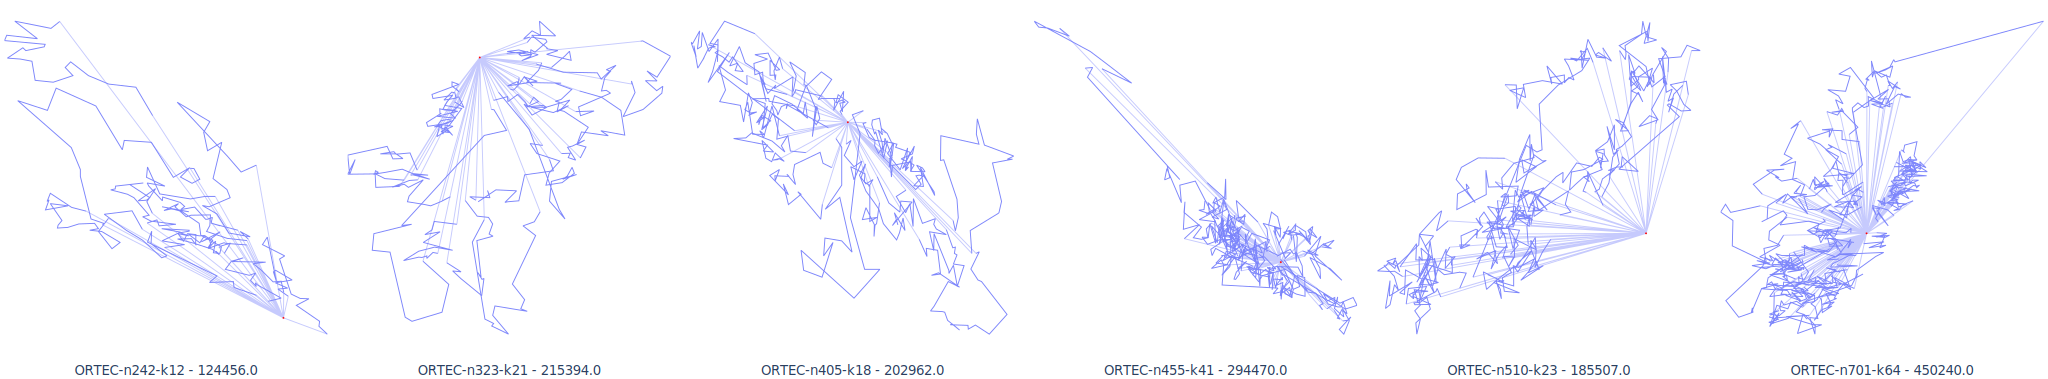

In [26]:
print("ORTEC instances:")
print("ClockHand")
show_init_graphs("ORTEC")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "ORTEC")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "ORTEC")

Loggi instances:
ClockHand


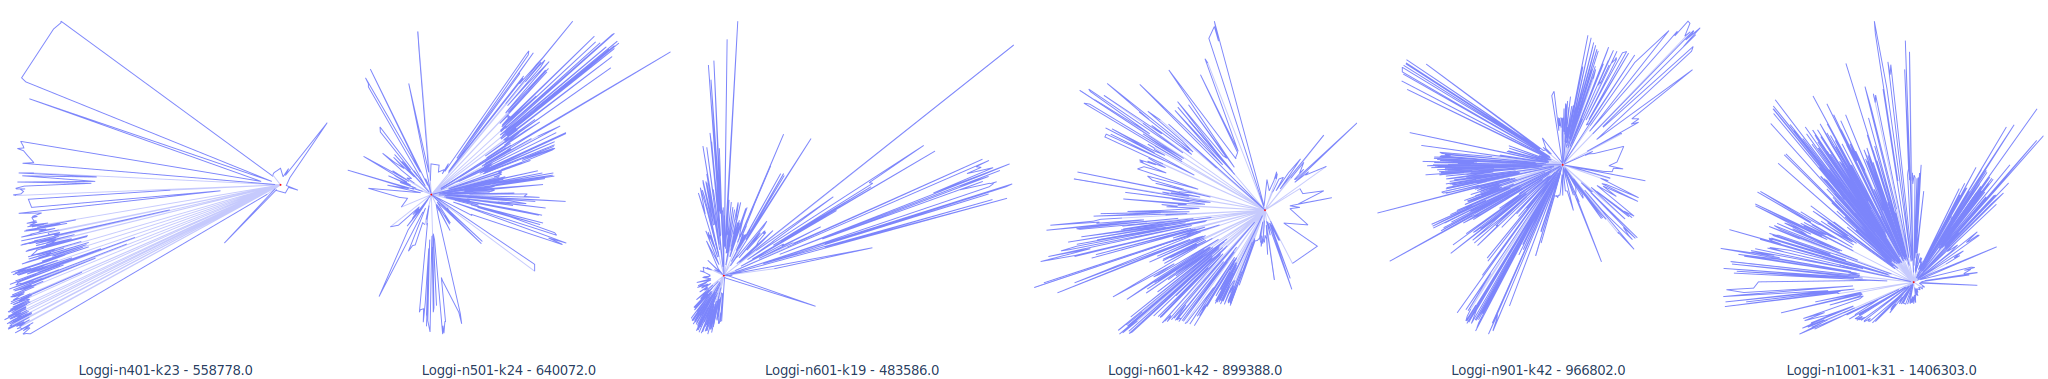

IRL_HGS2


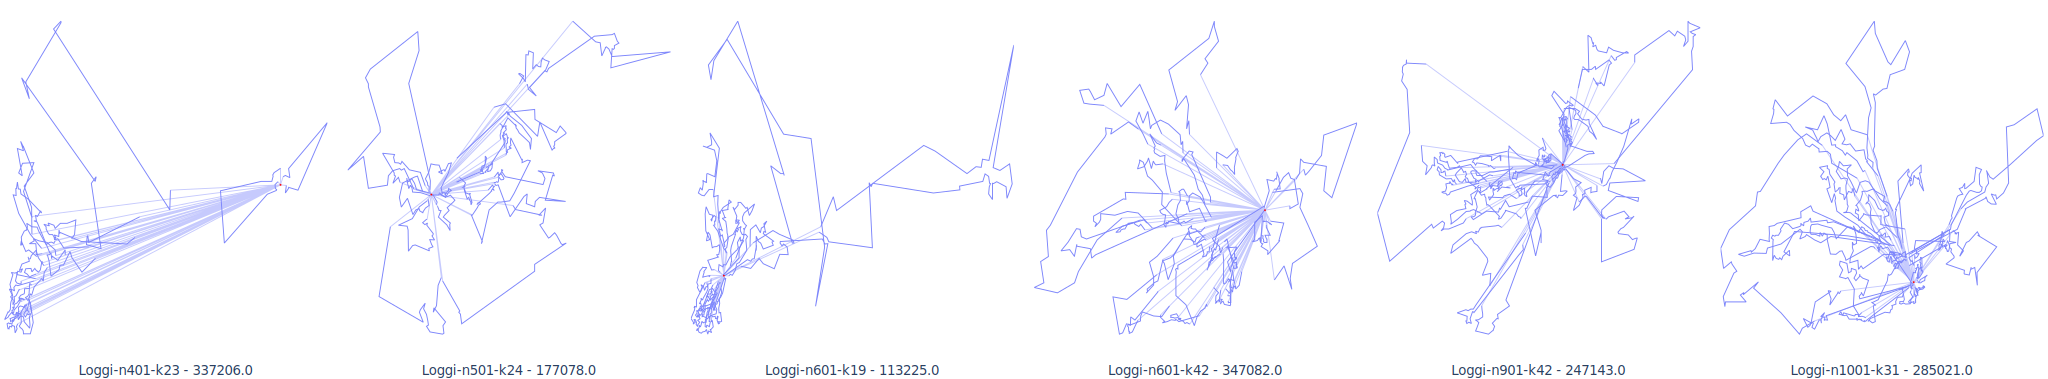

IRL_VNS2


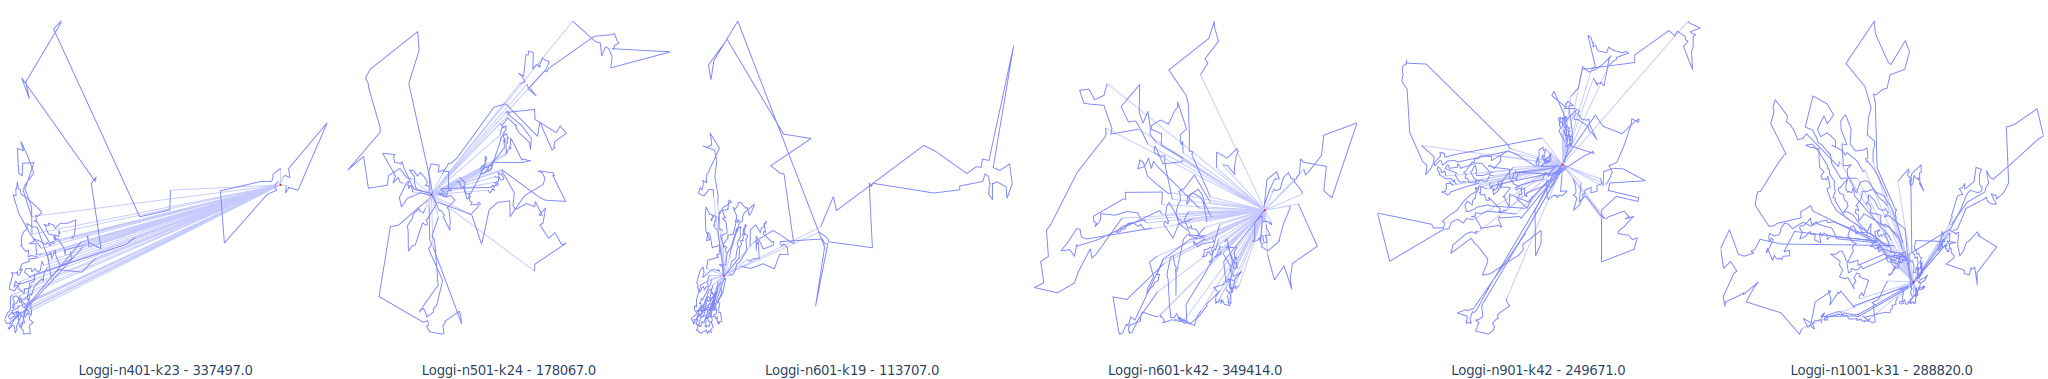

In [29]:
print("Loggi instances:")
print("ClockHand")
show_init_graphs("Loggi")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "Loggi")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "Loggi")

In [30]:
def create_scatter(data, name, line_color, showlegend):
    data = data.to_numpy().min(-1)
    best_data = []
    for x in data:
        best_data.append(x)
        best_data[-1] = min(best_data)
    data = best_data
    scatter = go.Scatter(x=np.arange(len(data))/len(data), y=data, mode='lines', legendgroup=name, name=name, line_width=2, line_color=line_color, showlegend=showlegend)
    return scatter

In [34]:
VRP_KEYS

['ORTEC-n242-k12.vrp',
 'ORTEC-n323-k21.vrp',
 'ORTEC-n405-k18.vrp',
 'ORTEC-n455-k41.vrp',
 'ORTEC-n510-k23.vrp',
 'ORTEC-n701-k64.vrp',
 'Loggi-n401-k23.vrp',
 'Loggi-n501-k24.vrp',
 'Loggi-n601-k19.vrp',
 'Loggi-n601-k42.vrp',
 'Loggi-n901-k42.vrp',
 'Loggi-n1001-k31.vrp']

In [39]:
keys = VRP_KEYS
n = 6
fig = make_subplots(rows=2, cols=n, horizontal_spacing=0.06, vertical_spacing=0.2)
for i, key in enumerate(keys):
    vns = create_scatter(irl_vns_2_df[key], 'VNS', "#EF553B", i==0)
    fig.append_trace(vns, row=i//n+1, col=i%n+1)
    fig['layout'][f'xaxis{i+1}'].update(title=key.split(".vrp")[0])
fig.update_layout(height=300, width=100*len(keys))
fig.update_traces(line_width=1, marker_size=2)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=True, showticklabels=False, showline=False, zeroline=False)
fig.show()

In [40]:
keys = VRP_KEYS
n = 6
fig = make_subplots(rows=2, cols=n, horizontal_spacing=0.06, vertical_spacing=0.2)
for i, key in enumerate(keys):
    hgs = create_scatter(irl_hgs_2_df[key], 'HGS', "#636EFA", i==0)
    fig.append_trace(hgs, row=i//n+1, col=i%n+1)
    fig['layout'][f'xaxis{i+1}'].update(title=key.split(".vrp")[0])
fig.update_layout(height=300, width=100*len(keys))
fig.update_traces(line_width=1, marker_size=2)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=True, showticklabels=False, showline=False, zeroline=False)
fig.show()